In [25]:
import requests

In [26]:
naver_url='http://www.naver.com/'
naver_response=requests.get(naver_url)

'\n<!doctype html>                <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메인에서 다양한 
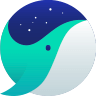
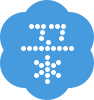

In [27]:
naver_response.text

In [38]:
import bs4

naver_bs=bs4.BeautifulSoup(naver_response.text,'lxml')

In [43]:
naver_bs.find('span',class_='keyword')

In [44]:
result=naver_bs.find('span', class_='keyword')



In [45]:
naver_bs.find_all('span',class_='keyword')


[]

In [46]:
import pandas as pd

In [47]:
fs_url='https://comp.fnguide.com/SVO2/ASP/SVD_Finance.asp?pGB=1&gicode=A005930&cID=&MenuYn=Y&ReportGB=D&NewMenuID=103&stkGb=701'
fs_page=requests.get(fs_url)
fs_tables=pd.read_html(fs_page.text)

In [48]:
fs_tables[0]

,IFRS(연결),2017/12,2018/12,2019/12,2020/09,전년동기,전년동기(%)
0,매출액,2395754.0,2437714.0,2304009.0,1752555.0,1705161.0,2.8
1,매출원가,1292907.0,1323944.0,1472395.0,1066834.0,1086850.0,-1.8
2,매출총이익,1102847.0,1113770.0,831613.0,685721.0,618311.0,10.9
3,판매비와관리비계산에 참여한 계정 펼치기,566397.0,524903.0,553928.0,416252.0,412229.0,1.0
4,영업이익,536450.0,588867.0,277685.0,269469.0,206082.0,30.8
5,영업이익(발표기준),536450.0,588867.0,277685.0,269469.0,206082.0,30.8
6,금융수익계산에 참여한 계정 펼치기,97374.0,99993.0,101616.0,78900.0,78645.0,0.3
7,금융원가계산에 참여한 계정 펼치기,89789.0,86089.0,82749.0,70780.0,63161.0,12.1
8,기타수익계산에 참여한 계정 펼치기,30107.0,14850.0,17787.0,11012.0,11789.0,-6.6
9,기타비용계산에 참여한 계정 펼치기,14196.0,11420.0,14147.0,18618.0,8752.0,112.7


In [51]:
temp_df=fs_tables[0]
temp_df=temp_df.set_index('IFRS(연결)')
temp_df=temp_df[['2017/12','2018/12','2019/12','2020/09']]

In [53]:
temp_df=temp_df.loc[['매출액','영업이익','당기순이익']]

In [55]:
temp_df2=fs_tables[2]
temp_df2=temp_df2.set_index('IFRS(연결)')
temp_df2=temp_df2.loc[['자산','부채','자본']]

In [57]:
temp_df3=fs_tables[4]
temp_df3=temp_df3.set_index('IFRS(연결)')
temp_df3=temp_df3.loc[['영업활동으로인한현금흐름']]

In [58]:
fs_df=pd.concat([temp_df,temp_df2,temp_df3])

In [230]:
def make_fs_dataframe(firm_code):
    fs_url='https://comp.fnguide.com/SVO2/ASP/SVD_Finance.asp?pGB=1&cID=&MenuYn=Y&ReportGB=D&NewMenuID=103&stkGb=701&gicode='+firm_code
    fs_page=requests.get(fs_url)
    fs_tables=pd.read_html(fs_page.text)
    
    temp_df=fs_tables[0]
    temp_df=temp_df.set_index(temp_df.columns[0])
    temp_df=temp_df[temp_df.columns[:4]]
    temp_df=temp_df.loc[['매출액','영업이익','당기순이익']]
    
    temp_df2=fs_tables[2]
    temp_df2=temp_df2.set_index(temp_df2.columns[0])
    temp_df2=temp_df2.loc[['자산','부채','자본']]
    
    temp_df3=fs_tables[4]
    temp_df3=temp_df3.set_index(temp_df3.columns[0])
    temp_df3=temp_df3.loc[['영업활동으로인한현금흐름']]
    
    fs_df=pd.concat([temp_df,temp_df2,temp_df3])
    
    return fs_df

In [231]:
make_fs_dataframe('A005380')

,2017/12,2018/12,2019/12,2020/09
IFRS(연결),,,,
매출액,963761.0,968126.0,1057464.0,747543.0
영업이익,45747.0,24222.0,36055.0,11403.0
당기순이익,45464.0,16450.0,31856.0,7412.0
자산,1781995.0,1806558.0,1945122.0,2070962.0
부채,1034421.0,1067597.0,1181465.0,1312461.0
자본,747574.0,738960.0,763658.0,758501.0
영업활동으로인한현금흐름,39224.0,37643.0,4198.0,22153.0


In [232]:
code='A005930'
fs_df=make_fs_dataframe(code)
temp_df=pd.DataFrame({code:fs_df['2017/12']})
temp_df=temp_df.T
temp_df.columns=[['2017/12']*len(fs_df),temp_df.columns]

In [233]:
code='A005930'
fs_df=make_fs_dataframe(code)

for num,col in enumerate(fs_df.columns):
    temp_df=pd.DataFrame({code:fs_df[col]})
    temp_df=temp_df.T
    temp_df.columns=[[col]*len(fs_df),temp_df.columns]
    if num==0:
        total_df=temp_df
    else:
        total_df=pd.merge(total_df,temp_df,how='outer',left_index=True,right_index=True)

In [258]:
def change_df(firm_code,dataframe):
    for num,col in enumerate(fs_df.columns):
        temp_df=pd.DataFrame({code:dataframe[col]})
        temp_df=temp_df.T
        temp_df.columns=[[col]*len(dataframe),temp_df.columns]
        if num==0:
            total_df=temp_df
        else:
            total_df=pd.merge(total_df,temp_df,how='outer',left_index=True,right_index=True)
    return total_df

In [259]:
firmcode_list=['A005930','A005380','A035420','A003550','A034730']

for num,code in enumerate(firmcode_list):
    fs_df=make_fs_dataframe(code)
    fs_df_changed=change_df(code,fs_df)
    if num == 0:
        total_fs=fs_df_changed
    else:
        total_fs=pd.concat([total_fs,fs_df_changed])


In [260]:
def make_fr_dataframe(firm_code):
    fr_url = 'https://comp.fnguide.com/SVO2/asp/SVD_FinanceRatio.asp?pGB=1&cID=&MenuYn=Y&ReportGB=D&NewMenuID=104&stkGb=701&gicode=' + firm_code
    fr_page = requests.get(fr_url)
    fr_tables = pd.read_html(fr_page.text)
    
    temp_df = fr_tables[0]
    
    temp_df = temp_df.set_index(temp_df.columns[0])
    temp_df = temp_df.loc[['유동비율계산에 참여한 계정 펼치기',
                           '부채비율계산에 참여한 계정 펼치기',
                           '영업이익률계산에 참여한 계정 펼치기',
                           'ROA계산에 참여한 계정 펼치기',
                           'ROIC계산에 참여한 계정 펼치기']]
    temp_df.index = ['유동비율', '부채비율', '영업이익률', 'ROA', 'ROIC']
    return temp_df


In [261]:
firmcode_list=['A005930','A005380','A035420','A003550','A034730']
for num, code in enumerate(firmcode_list):
    fr_df = make_fr_dataframe(code)
    fr_df_changed = change_df(code, fr_df)
    
    if num == 0 :
        total_fr = fr_df_changed
    else:
        total_fr = pd.concat([total_fr, fr_df_changed])


In [262]:
def make_invest_dataframe(firm_code):
    invest_url = 'https://comp.fnguide.com/SVO2/asp/SVD_Invest.asp?pGB=1&cID=&MenuYn=Y&ReportGB=D&NewMenuID=105&stkGb=701&gicode=' + firm_code
    invest_page = requests.get(invest_url)
    invest_tables = pd.read_html(invest_page.text)
    temp_df = invest_tables[1]
    
    temp_df = temp_df.set_index(temp_df.columns[0])
    temp_df = temp_df.loc[['PER계산에 참여한 계정 펼치기','PCR계산에 참여한 계정 펼치기','PSR계산에 참여한 계정 펼치기','PBR계산에 참여한 계정 펼치기','총현금흐름']]
    temp_df.index = ['PER', 'PCR', 'PSR', 'PBR', '총현금흐름']
    return temp_df

In [263]:
 firmcode_list = ['A005930', 'A005380', 'A035420', 'A003550', 'A034730']
 
 for num, code in enumerate(firmcode_list):
     invest_df = make_invest_dataframe(code)
     invest_df_changed = change_df(code, invest_df)
     if num == 0 :
         total_invest = invest_df_changed
     else:
         total_invest = pd.concat([total_invest, invest_df_changed])

In [264]:
path=r'C:\Users\lge\Desktop\파이썬연습\data.xls'
code_data=pd.read_excel(path)
code_data=code_data[['종목코드','기업명']]

In [144]:
code_data

,종목코드,기업명
0,60310,3S
1,95570,AJ네트웍스
2,6840,AK홀딩스
3,54620,APS홀딩스
4,265520,AP시스템
...,...,...
2406,189980,흥국에프엔비
2407,540,흥국화재
2408,3280,흥아해운
2409,37440,희림


In [265]:
def make_code(x):
    x=str(x)
    return 'A'+'0'*(6-len(x))+x

code_data['종목코드']=code_data['종목코드'].apply(make_code)

In [266]:
code_data

,종목코드,기업명
0,A060310,3S
1,A095570,AJ네트웍스
2,A006840,AK홀딩스
3,A054620,APS홀딩스
4,A265520,AP시스템
...,...,...
2406,A189980,흥국에프엔비
2407,A000540,흥국화재
2408,A003280,흥아해운
2409,A037440,희림


In [151]:
import time

for num,code in enumerate(code_data['종목코드']):
    try:
        print(num,code)
        time.sleep(1)
        try:
            fs_df=make_fs_dataframe(code)
        except requests.exceptions.Timeout:
            time.sleep(60)
            fs_df=make_fs_dataframe(code)
        fs_df_changed=change_df(code,fs_df)
        if num == 0:
            total_fs=fs_df_changed
        else:
            total_fs=pd.concat([total_fs,fs_df_changed])
    except ValueError:
        continue
    except KeyError:
        continue

0 A060310
1 A095570
2 A006840
3 A054620
4 A265520
5 A211270
6 A027410
7 A282330
8 A138930
9 A001460
10 A001040
11 A079160
12 A035760
13 A000120
14 A011150
15 A097950
16 A051500
17 A058820
18 A023460
19 A065770
20 A083660
21 A000590
22 A012030
23 A367340
24 A016610
25 A005830
26 A000990
27 A139130
28 A068790
29 A004840
30 A241520
31 A155660
32 A069730
33 A017940
34 A245620
35 A037370
36 A079190
37 A365550
38 A007700
39 A130500
40 A114090
41 A900290
42 A078930
43 A083450
44 A006360
45 A001250
46 A007070
47 A028150
48 A045890
49 A078150
50 A012630
51 A039570
52 A089470
53 A294870
54 A011200
55 A036640
56 A082740
57 A335870
58 A351340
59 A351320
60 A095340
61 A099520
62 A175330
63 A950170
64 A234080
65 A067290
66 A001060
67 A096760
68 A035900
69 A024840
70 A105560
71 A024120
72 A021320
73 A036670
74 A009440
75 A112190
76 A119650
77 A044180
78 A092220
79 A151860
80 A016380
81 A046440
82 A035600
83 A001390
84 A060720
85 A001940
86 A122450
87 A052900
88 A058400
89 A114450
90 A025000
91 A09223

692 A012690
693 A005360
694 A080420
695 A080160
696 A204210
697 A100030
698 A087260
699 A101330
700 A012860
701 A250060
702 A033200
703 A009680
704 A118990
705 A006920
706 A009580
707 A001810
708 A009200
709 A322970
710 A033920
711 A008420
712 A279600
713 A028040
714 A095500
715 A025560
716 A218150
717 A007120
718 A006800
719 A353490
720 A328380
721 A333430
722 A357250
723 A100790
724 A085620
725 A208890
726 A049950
727 A213090
728 A207760
729 A225850
730 A002840
731 A268280
732 A107590
733 A134380
734 A003650
735 A059090
736 A214610
737 A201490
738 A950190
739 A214180
740 A155900
741 A206640
742 A018700
743 A035620
744 A064520
745 A053030
746 A301300
747 A064550
748 A208710
749 A142760
750 A086820
751 A038460
752 A281310
753 A266470
754 A216400
755 A086040
756 A199290
757 A032980
758 A222160
759 A043150
760 A323990
761 A003610
762 A267790
763 A001340
764 A046310
765 A035150
766 A036620
767 A066410
768 A002410
769 A206400
770 A019010
771 A177350
772 A299910
773 A096300
774 A007210
775 

1346 A140610
1347 A101400
1348 A036570
1349 A217820
1350 A138250
1351 A031860
1352 A238170
1353 A224760
1354 A310840
1355 A319400
1356 A353190
1357 A359090
1358 A365590
1359 A181710
1360 A265740
1361 A354200
1362 A093510
1363 A208860
1364 A183490
1365 A085310
1366 A182400
1367 A009810
1368 A069410
1369 A227950
1370 A198080
1371 A004250
1372 A048830
1373 A096870
1374 A276240
1375 A900140
1376 A061970
1377 A138690
1378 A290650
1379 A066970
1380 A156100
1381 A010120
1382 A311060
1383 A073110
1384 A083310
1385 A297890
1386 A037950
1387 A170920
1388 A058630
1389 A058970
1390 A019590
1391 A169330
1392 A097520
1393 A179290
1394 A225860
1395 A009780
1396 A123040
1397 A323230
1398 A032790
1399 A033160
1400 A347890
1401 A033310
1402 A259630
1403 A115960
1404 A060850
1405 A014440
1406 A007530
1407 A143540
1408 A111770
1409 A009970
1410 A003520
1411 A000670
1412 A036560
1413 A006740
1414 A012280
1415 A265560
1416 A012160
1417 A036000
1418 A250930
1419 A053280
1420 A015360
1421 A122640
1422 A179720

1977 A005740
1978 A215570
1979 A043590
1980 A114120
1981 A110790
1982 A900250
1983 A083790
1984 A045520
1985 A214150
1986 A352770
1987 A237880
1988 A139670
1989 A020120
1990 A311270
1991 A039490
1992 A012170
1993 A054780
1994 A219130
1995 A180060
1996 A065130
1997 A014580
1998 A015890
1999 A006890
2000 A023160
2001 A003240
2002 A011280
2003 A053620
2004 A004100
2005 A116100
2006 A009410
2007 A044490
2008 A124560
2009 A001420
2010 A007980
2011 A191420
2012 A073640
2013 A182690
2014 A066700
2015 A095610
2016 A131970
2017 A055490
2018 A308700
2019 A089030
2020 A258050
2021 A054450
2022 A091440
2023 A078000
2024 A200230
2025 A214420
2026 A215480
2027 A051360
2028 A045340
2029 A108230
2030 A079970
2031 A199800
2032 A105550
2033 A026150
2034 A322180
2035 A117730
2036 A033830
2037 A084870
2038 A057680
2039 A064760
2040 A246710
2041 A340570
2042 A277880
2043 A131290
2044 A019180
2045 A356860
2046 A062860
2047 A363280
2048 A321550
2049 A091810
2050 A004870
2051 A191600
2052 A104480
2053 A309900

In [267]:
total_fs.to_excel(r'C:\Users\lge\Desktop\파이썬연습\재무제표데이터.xlsx')

In [248]:
for num, code in enumerate(code_data['종목코드']):
    try:
        print(num, code)
        time.sleep(1)
        try:
            fr_df = make_fr_dataframe(code)
        except requests.exceptions.Timeout:
            time.sleep(60)
            fr_df = make_fr_dataframe(code)
        fr_df_changed = change_df(code, fr_df)
        if num == 0 :
            total_fr = fr_df_changed
        else:
            total_fr = pd.concat([total_fr, fr_df_changed])
    except ValueError:
        continue
    except KeyError:
        continue


0 060310
1 095570
2 006840
3 054620
4 265520
5 211270
6 027410
7 282330
8 138930
9 001460
10 001040
11 079160
12 035760
13 000120
14 011150
15 097950
16 051500
17 058820
18 023460
19 065770
20 083660
21 000590
22 012030
23 367340
24 016610
25 005830
26 000990
27 139130
28 068790
29 004840
30 241520
31 155660
32 069730
33 017940
34 245620
35 037370
36 079190
37 365550
38 007700
39 130500
40 114090
41 900290
42 078930
43 083450
44 006360
45 001250
46 007070
47 028150
48 045890
49 078150
50 012630
51 039570
52 089470
53 294870
54 011200
55 036640
56 082740
57 335870
58 351340
59 351320
60 095340
61 099520
62 175330
63 950170
64 234080
65 067290
66 001060
67 096760
68 035900
69 024840
70 105560
71 024120
72 021320
73 036670
74 009440
75 112190
76 119650
77 044180
78 092220
79 151860
80 016380
81 046440
82 035600
83 001390
84 060720
85 001940
86 122450
87 052900
88 058400
89 114450
90 025000
91 092230
92 000040
93 044450
94 030210
95 036030
96 058850
97 058860
98 060370
99 093050
100 003550

755 086040
756 199290
757 032980
758 222160
759 043150
760 323990
761 003610
762 267790
763 001340
764 046310
765 035150
766 036620
767 066410
768 002410
769 206400
770 019010
771 177350
772 299910
773 096300
774 007210
775 225530
776 250000
777 002760
778 003850
779 006910
780 000890
781 226340
782 206950
783 003000
784 001270
785 026940
786 014470
787 015350
788 011390
789 005030
790 008470
791 100120
792 337930
793 066980
794 064480
795 288330
796 251630
797 018290
798 263920
799 033560
800 126340
801 121800
802 148140
803 082800
804 318410
805 002070
806 100220
807 200780
808 141000
809 090460
810 083650
811 215050
812 086670
813 335890
814 138580
815 082920
816 054220
817 042370
818 030790
819 032850
820 148780
821 238200
822 093190
823 065450
824 210120
825 352820
826 005180
827 072950
828 266170
829 143240
830 003960
831 008040
832 007160
833 014710
834 006090
835 100090
836 122350
837 014970
838 018310
839 053700
840 009620
841 023600
842 111870
843 001470
844 006400
845 006660

1459 251370
1460 066430
1461 193250
1462 273060
1463 019210
1464 122870
1465 332570
1466 079000
1467 070960
1468 114630
1469 316140
1470 032820
1471 041190
1472 115440
1473 004720
1474 118000
1475 046970
1476 082850
1477 215360
1478 072470
1479 073560
1480 153490
1481 037400
1482 010050
1483 101170
1484 006980
1485 066590
1486 017370
1487 103840
1488 046940
1489 215380
1490 065680
1491 105840
1492 018620
1493 010400
1494 049800
1495 016880
1496 095720
1497 005820
1498 278380
1499 053080
1500 032940
1501 240810
1502 074600
1503 104830
1504 014190
1505 030530
1506 012620
1507 216280
1508 122830
1509 008370
1510 008290
1511 101160
1512 095270
1513 010600
1514 065950
1515 076080
1516 196700
1517 069080
1518 053580
1519 071460
1520 044340
1521 330350
1522 348350
1523 112040
1524 065370
1525 140660
1526 038620
1527 299900
1528 036090
1529 136540
1530 320000
1531 097800
1532 192390
1533 313760
1534 008600
1535 900340
1536 033270
1537 014830
1538 036200
1539 018000
1540 000910
1541 047400
1542

2142 051380
2143 241820
2144 237750
2145 131390
2146 024850
2147 319660
2148 031980
2149 002230
2150 242350
2151 239890
2152 347740
2153 137400
2154 128660
2155 006140
2156 304840
2157 062970
2158 087600
2159 057880
2160 033180
2161 161580
2162 347770
2163 332710
2164 341160
2165 343510
2166 086790
2167 299030
2168 067310
2169 307160
2170 166090
2171 293480
2172 039130
2173 136480
2174 003380
2175 172580
2176 153360
2177 149980
2178 013030
2179 126700
2180 106080
2181 071090
2182 340120
2183 221840
2184 106190
2185 019490
2186 000080
2187 000140
2188 066130
2189 152550
2190 004590
2191 036460
2192 039340
2193 005430
2194 071050
2195 034950
2196 010040
2197 025540
2198 222980
2199 331660
2200 318000
2201 256840
2202 004090
2203 025550
2204 002200
2205 002960
2206 023890
2207 017890
2208 080720
2209 123890
2210 015760
2211 063570
2212 041460
2213 006200
2214 101680
2215 039740
2216 053300
2217 025770
2218 291210
2219 310870
2220 009540
2221 023350
2222 025890
2223 000970
2224 104700
2225

In [268]:
total_fr.to_excel(r'C:\Users\lge\Desktop\파이썬연습\재무비율데이터.xlsx')

In [249]:
 for num, code in enumerate(code_data['종목코드']):
     try:
         print(num, code)
         time.sleep(1)
         try:
             invest_df = make_invest_dataframe(code)
         except requests.exceptions.Timeout:
             time.sleep(60)
             invest_df = make_invest_dataframe(code)
         invest_df_changed = change_df(code, invest_df)
         if num == 0 :
             total_invest = invest_df_changed
         else:
             total_invest = pd.concat([total_invest, invest_df_changed])
     except ValueError:
         continue
     except KeyError:
         continue


0 060310
1 095570
2 006840
3 054620
4 265520
5 211270
6 027410
7 282330
8 138930
9 001460
10 001040
11 079160
12 035760
13 000120
14 011150
15 097950
16 051500
17 058820
18 023460
19 065770
20 083660
21 000590
22 012030
23 367340
24 016610
25 005830
26 000990
27 139130
28 068790
29 004840
30 241520
31 155660
32 069730
33 017940
34 245620
35 037370
36 079190
37 365550
38 007700
39 130500
40 114090
41 900290
42 078930
43 083450
44 006360
45 001250
46 007070
47 028150
48 045890
49 078150
50 012630
51 039570
52 089470
53 294870
54 011200
55 036640
56 082740
57 335870
58 351340
59 351320
60 095340
61 099520
62 175330
63 950170
64 234080
65 067290
66 001060
67 096760
68 035900
69 024840
70 105560
71 024120
72 021320
73 036670
74 009440
75 112190
76 119650
77 044180
78 092220
79 151860
80 016380
81 046440
82 035600
83 001390
84 060720
85 001940
86 122450
87 052900
88 058400
89 114450
90 025000
91 092230
92 000040
93 044450
94 030210
95 036030
96 058850
97 058860
98 060370
99 093050
100 003550

755 086040
756 199290
757 032980
758 222160
759 043150
760 323990
761 003610
762 267790
763 001340
764 046310
765 035150
766 036620
767 066410
768 002410
769 206400
770 019010
771 177350
772 299910
773 096300
774 007210
775 225530
776 250000
777 002760
778 003850
779 006910
780 000890
781 226340
782 206950
783 003000
784 001270
785 026940
786 014470
787 015350
788 011390
789 005030
790 008470
791 100120
792 337930
793 066980
794 064480
795 288330
796 251630
797 018290
798 263920
799 033560
800 126340
801 121800
802 148140
803 082800
804 318410
805 002070
806 100220
807 200780
808 141000
809 090460
810 083650
811 215050
812 086670
813 335890
814 138580
815 082920
816 054220
817 042370
818 030790
819 032850
820 148780
821 238200
822 093190
823 065450
824 210120
825 352820
826 005180
827 072950
828 266170
829 143240
830 003960
831 008040
832 007160
833 014710
834 006090
835 100090
836 122350
837 014970
838 018310
839 053700
840 009620
841 023600
842 111870
843 001470
844 006400
845 006660

1459 251370
1460 066430
1461 193250
1462 273060
1463 019210
1464 122870
1465 332570
1466 079000
1467 070960
1468 114630
1469 316140
1470 032820
1471 041190
1472 115440
1473 004720
1474 118000
1475 046970
1476 082850
1477 215360
1478 072470
1479 073560
1480 153490
1481 037400
1482 010050
1483 101170
1484 006980
1485 066590
1486 017370
1487 103840
1488 046940
1489 215380
1490 065680
1491 105840
1492 018620
1493 010400
1494 049800
1495 016880
1496 095720
1497 005820
1498 278380
1499 053080
1500 032940
1501 240810
1502 074600
1503 104830
1504 014190
1505 030530
1506 012620
1507 216280
1508 122830
1509 008370
1510 008290
1511 101160
1512 095270
1513 010600
1514 065950
1515 076080
1516 196700
1517 069080
1518 053580
1519 071460
1520 044340
1521 330350
1522 348350
1523 112040
1524 065370
1525 140660
1526 038620
1527 299900
1528 036090
1529 136540
1530 320000
1531 097800
1532 192390
1533 313760
1534 008600
1535 900340
1536 033270
1537 014830
1538 036200
1539 018000
1540 000910
1541 047400
1542

2142 051380
2143 241820
2144 237750
2145 131390
2146 024850
2147 319660
2148 031980
2149 002230
2150 242350
2151 239890
2152 347740
2153 137400
2154 128660
2155 006140
2156 304840
2157 062970
2158 087600
2159 057880
2160 033180
2161 161580
2162 347770
2163 332710
2164 341160
2165 343510
2166 086790
2167 299030
2168 067310
2169 307160
2170 166090
2171 293480
2172 039130
2173 136480
2174 003380
2175 172580
2176 153360
2177 149980
2178 013030
2179 126700
2180 106080
2181 071090
2182 340120
2183 221840
2184 106190
2185 019490
2186 000080
2187 000140
2188 066130
2189 152550
2190 004590
2191 036460
2192 039340
2193 005430
2194 071050
2195 034950
2196 010040
2197 025540
2198 222980
2199 331660
2200 318000
2201 256840
2202 004090
2203 025550
2204 002200
2205 002960
2206 023890
2207 017890
2208 080720
2209 123890
2210 015760
2211 063570
2212 041460
2213 006200
2214 101680
2215 039740
2216 053300
2217 025770
2218 291210
2219 310870
2220 009540
2221 023350
2222 025890
2223 000970
2224 104700
2225

In [269]:
total_invest.to_excel(r'C:\Users\lge\Desktop\파이썬연습\투자지표데이터.xlsx')

In [162]:
import requests
import bs4
import pandas as pd
import time


In [163]:
price_url='http://fchart.stock.naver.com/sise.nhn?symbol=005930&timeframe=day&count=1500&requestType=0'
price_data=requests.get(price_url)

In [165]:
price_data_bs=bs4.BeautifulSoup(price_data.text,'lxml')

In [167]:
item_list=price_data_bs.find_all('item')

In [170]:
item_list[0]

<item data="20141203|26000|26020|25900|25960|194710"></item>

In [171]:
temp=item_list[0]['data']

In [173]:
temp.split('|')

['20141203', '26000', '26020', '25900', '25960', '194710']

In [174]:
for item in item_list:
    temp_data=item['data']
    datas=temp_data.split('|')
    print(datas[0],datas[4])

20141203 25960
20141204 26000
20141205 26040
20141208 26380
20141209 26980
20141210 26340
20141211 26100
20141212 25720
20141215 25460
20141216 25580
20141217 25320
20141218 25320
20141219 26560
20141222 26900
20141223 26780
20141224 26860
20141226 27040
20141229 26580
20141230 26540
20150102 26600
20150105 26660
20150106 25900
20150107 26140
20150108 26280
20150109 26280
20150112 26320
20150113 26780
20150114 26900
20150115 26680
20150116 26320
20150119 26860
20150120 27440
20150121 27900
20150122 27560
20150123 27720
20150126 27780
20150127 28000
20150128 27560
20150129 27200
20150130 27300
20150202 27360
20150203 27320
20150204 27180
20150205 27160
20150206 27440
20150209 27900
20150210 27560
20150211 27100
20150212 26880
20150213 27220
20150216 27480
20150217 27540
20150223 27340
20150224 27340
20150225 27580
20150226 27500
20150227 27140
20150302 28460
20150303 28360
20150304 28740
20150305 28440
20150306 28840
20150309 28400
20150310 28420
20150311 29480
20150312 28940
20150313 2

20170718 50840
20170719 50740
20170720 51200
20170721 51080
20170724 50860
20170725 50000
20170726 49840
20170727 49800
20170728 47760
20170731 48200
20170801 48600
20170802 49000
20170803 47780
20170804 47700
20170807 47580
20170808 47720
20170809 46280
20170810 45900
20170811 44620
20170814 45000
20170816 46200
20170817 47040
20170818 46900
20170821 46840
20170822 47000
20170823 47480
20170824 47520
20170825 47020
20170828 46100
20170829 46080
20170830 46200
20170831 46320
20170901 46480
20170904 46040
20170905 46760
20170906 47000
20170907 48120
20170908 49080
20170911 49800
20170912 49600
20170913 49620
20170914 50300
20170915 50400
20170918 52480
20170919 52120
20170920 52220
20170921 52800
20170922 53000
20170925 53620
20170926 51660
20170927 51680
20170928 51260
20170929 51280
20171010 52800
20171011 54640
20171012 54800
20171013 54000
20171016 53920
20171017 54800
20171018 54760
20171019 52980
20171020 53840
20171023 54300
20171024 54040
20171025 53900
20171026 52400
20171027 5

In [190]:
date_list=[]
price_list=[]
for item in item_list:
    temp_data=item['data']
    datas=temp_data.split('|')
    date_list.append(datas[0])
    price_list.append(datas[4])

price_df=pd.DataFrame({'종가':price_list},index=date_list)
price_df

,종가
20141203,25960
20141204,26000
20141205,26040
20141208,26380
20141209,26980
...,...
20210105,83900
20210106,82200
20210107,82900
20210108,88800


In [193]:
def make_price_dataframe(code,timeframe,count):
    url='http://fchart.stock.naver.com/sise.nhn?requestType=0'
    price_url=url + '&symbol='+code+'&timeframe='+timeframe+'&count='+count
    price_data=requests.get(price_url)
    price_data_bs=bs4.BeautifulSoup(price_data.text,'lxml')
    item_list=price_data_bs.find_all('item')
    
    date_list=[]
    price_list=[]
    for item in item_list:
        temp_data=item['data']
        datas=temp_data.split('|')
        date_list.append(datas[0])
        price_list.append(datas[4])

    price_df=pd.DataFrame({code:price_list},index=date_list)
    
    return price_df

In [194]:
make_price_dataframe('005380','day','1500')

,005380
20141203,177500
20141204,185000
20141205,188000
20141208,185500
20141209,181500
...,...
20210105,209500
20210106,203000
20210107,206000
20210108,246000


In [195]:

firmcode_list=['005930','005380','035420','003550','034730']

for num, code in enumerate(firmcode_list):
    price_df=make_price_dataframe(code,'day','1500')
    if num == 0:
        total_price=price_df
    else:
        total_price=pd.merge(total_price,price_df,how='outer',right_index=True,left_index=True)


In [196]:
total_price

,005930,005380,035420,003550,034730
20141203,25960,177500,147009,66000,215500
20141204,26000,185000,147409,66000,215500
20141205,26040,188000,147409,66100,227000
20141208,26380,185500,146207,65500,217500
20141209,26980,181500,145406,65100,211500
...,...,...,...,...,...
20210105,83900,209500,292500,98300,251500
20210106,82200,203000,290000,97300,273000
20210107,82900,206000,289500,107500,296000
20210108,88800,246000,312000,105500,292500


In [197]:
path=r'C:\Users\lge\Desktop\파이썬연습\data.xls'
code_data=pd.read_excel(path)
code_data=code_data[['종목코드','기업명']]

def make_code2(x):
    x=str(x)
    return '0'*(6-len(x))+x


code_data['종목코드']=code_data['종목코드'].apply(make_code2)

In [199]:
for num,code in enumerate(code_data['종목코드']):
    try:
        print(num,code)
        time.sleep(1)
        try:
            price_df=make_price_dataframe(code,'day','1500')
        except requests.exceptions.Timeout:
            time.sleep(60)
            price_df=make_price_dataframe(code,'day','1500')
        if num == 0:
            total_price = price_df
        else:
            total_price=pd.merge(total_price,price_df,how='outer',right_index=True,left_index=True)
    except ValueError:
        continue
    except KeyError:
        continue
        

0 060310
1 095570
2 006840
3 054620
4 265520
5 211270
6 027410
7 282330
8 138930
9 001460
10 001040
11 079160
12 035760
13 000120
14 011150
15 097950
16 051500
17 058820
18 023460
19 065770
20 083660
21 000590
22 012030
23 367340
24 016610
25 005830
26 000990
27 139130
28 068790
29 004840
30 241520
31 155660
32 069730
33 017940
34 245620
35 037370
36 079190
37 365550
38 007700
39 130500
40 114090
41 900290
42 078930
43 083450
44 006360
45 001250
46 007070
47 028150
48 045890
49 078150
50 012630
51 039570
52 089470
53 294870
54 011200
55 036640
56 082740
57 335870
58 351340
59 351320
60 095340
61 099520
62 175330
63 950170
64 234080
65 067290
66 001060
67 096760
68 035900
69 024840
70 105560
71 024120
72 021320
73 036670
74 009440
75 112190
76 119650
77 044180
78 092220
79 151860
80 016380
81 046440
82 035600
83 001390
84 060720
85 001940
86 122450
87 052900
88 058400
89 114450
90 025000
91 092230
92 000040
93 044450
94 030210
95 036030
96 058850
97 058860
98 060370
99 093050
100 003550

755 086040
756 199290
757 032980
758 222160
759 043150
760 323990
761 003610
762 267790
763 001340
764 046310
765 035150
766 036620
767 066410
768 002410
769 206400
770 019010
771 177350
772 299910
773 096300
774 007210
775 225530
776 250000
777 002760
778 003850
779 006910
780 000890
781 226340
782 206950
783 003000
784 001270
785 026940
786 014470
787 015350
788 011390
789 005030
790 008470
791 100120
792 337930
793 066980
794 064480
795 288330
796 251630
797 018290
798 263920
799 033560
800 126340
801 121800
802 148140
803 082800
804 318410
805 002070
806 100220
807 200780
808 141000
809 090460
810 083650
811 215050
812 086670
813 335890
814 138580
815 082920
816 054220
817 042370
818 030790
819 032850
820 148780
821 238200
822 093190
823 065450
824 210120
825 352820
826 005180
827 072950
828 266170
829 143240
830 003960
831 008040
832 007160
833 014710
834 006090
835 100090
836 122350
837 014970
838 018310
839 053700
840 009620
841 023600
842 111870
843 001470
844 006400
845 006660

1459 251370
1460 066430
1461 193250
1462 273060
1463 019210
1464 122870
1465 332570
1466 079000
1467 070960
1468 114630
1469 316140
1470 032820
1471 041190
1472 115440
1473 004720
1474 118000
1475 046970
1476 082850
1477 215360
1478 072470
1479 073560
1480 153490
1481 037400
1482 010050
1483 101170
1484 006980
1485 066590
1486 017370
1487 103840
1488 046940
1489 215380
1490 065680
1491 105840
1492 018620
1493 010400
1494 049800
1495 016880
1496 095720
1497 005820
1498 278380
1499 053080
1500 032940
1501 240810
1502 074600
1503 104830
1504 014190
1505 030530
1506 012620
1507 216280
1508 122830
1509 008370
1510 008290
1511 101160
1512 095270
1513 010600
1514 065950
1515 076080
1516 196700
1517 069080
1518 053580
1519 071460
1520 044340
1521 330350
1522 348350
1523 112040
1524 065370
1525 140660
1526 038620
1527 299900
1528 036090
1529 136540
1530 320000
1531 097800
1532 192390
1533 313760
1534 008600
1535 900340
1536 033270
1537 014830
1538 036200
1539 018000
1540 000910
1541 047400
1542

2142 051380
2143 241820
2144 237750
2145 131390
2146 024850
2147 319660
2148 031980
2149 002230
2150 242350
2151 239890
2152 347740
2153 137400
2154 128660
2155 006140
2156 304840
2157 062970
2158 087600
2159 057880
2160 033180
2161 161580
2162 347770
2163 332710
2164 341160
2165 343510
2166 086790
2167 299030
2168 067310
2169 307160
2170 166090
2171 293480
2172 039130
2173 136480
2174 003380
2175 172580
2176 153360
2177 149980
2178 013030
2179 126700
2180 106080
2181 071090
2182 340120
2183 221840
2184 106190
2185 019490
2186 000080
2187 000140
2188 066130
2189 152550
2190 004590
2191 036460
2192 039340
2193 005430
2194 071050
2195 034950
2196 010040
2197 025540
2198 222980
2199 331660
2200 318000
2201 256840
2202 004090
2203 025550
2204 002200
2205 002960
2206 023890
2207 017890
2208 080720
2209 123890
2210 015760
2211 063570
2212 041460
2213 006200
2214 101680
2215 039740
2216 053300
2217 025770
2218 291210
2219 310870
2220 009540
2221 023350
2222 025890
2223 000970
2224 104700
2225

In [200]:
total_price.index=pd.to_datetime(total_price.index)
total_price.to_excel(r'C:\Users\lge\Desktop\파이썬연습\가격데이터.xlsx')